In [1]:
import numpy as np
from scipy import interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io

import nelpy as nel  # recommended import for nelpy
import nelpy.plotting as npl  # recommended import for the nelpy plotting library

%matplotlib inline

from nelpy import EpochArray, AnalogSignalArray, SpikeTrainArray, BinnedSpikeTrainArray

In [2]:
nel

<module 'nelpy' from '/home/shayok/Documents/Code/nelpy/nelpy/__init__.py'>

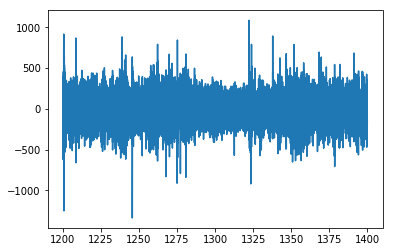

In [3]:
myFile = np.load('/home/shayok/Downloads/LFP.npz')
lfp = myFile['dataT2C1']*0.195
onlineRippleDetect = myFile['onlineRippleDetect']
offlineRippleDetect = myFile['offlineRippleDetections']
timeStampsSeconds = myFile['timeStampsSeconds']
timeStamps = myFile['timeStamps']
plt.plot(timeStampsSeconds,lfp)
plt.show()

In [4]:
np.transpose([timeStamps,lfp]).shape

(600000, 2)

1. support single values ASA([1])<br><br>
2. empty values ASA([]) -- FIXED<br><br>
3. out of bounds errors! :)

In [5]:
my_lfp = AnalogSignalArray([])
# my_lfp.ydata
# my_lfp.support
my_lfp

<empty AnalogSignal>

In [6]:
tingData = scipy.io.loadmat("/home/shayok/Downloads/simiplified(Newton, 2015-03-11_15-09-22).mat")
eeg = tingData["eeg"]
eegTimeStamps = tingData["eegtimestamp"]

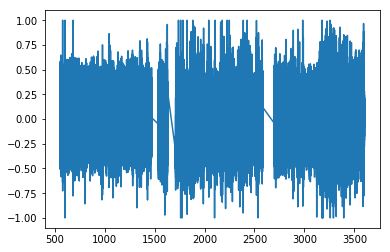

In [7]:
plt.plot(eegTimeStamps, eeg)
plt.show()

# Basic AnalogSignalArray Functionality

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1387: UserWarning: support created with given tdata and sampling rate, fs!


Mean
-0.1089335
[-0.1089335   0.63333333]
Standard Deviation
135.264969471
[ 135.26496947   56.26957931]
min
-1338.87
[-1338.87     0.  ]
max
1087.905
[ 1087.905  5000.   ]


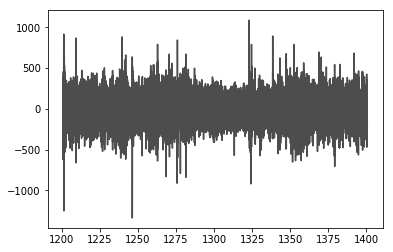

In [8]:
my_lfp = AnalogSignalArray([lfp],tdata=timeStamps,fs=30000,step=10)
print("Mean")
print(my_lfp.mean())
print(np.mean(np.transpose([lfp,onlineRippleDetect]),axis=0))
print("Standard Deviation")
print(my_lfp.std())
print(np.std(np.transpose([lfp,onlineRippleDetect]),axis=0))
print("min")
print(my_lfp.min())
print(np.amin(np.transpose([lfp,onlineRippleDetect]),axis=0))
print("max")
print(my_lfp.max())
print(np.amax(np.transpose([lfp,onlineRippleDetect]),axis=0))
npl.plot(my_lfp)

In [9]:
my_lfp

<AnalogSignalArray at 0x7fdf28053a90: 1 signal> for a total of 3:19.1000 minutes

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1402: UserWarning: support created with just tdata! no sampling rate specified so support is entire range of signal
/home/shayok/Documents/Code/nelpy/nelpy/utils.py:113: UserWarning: some steps in the data are smaller than the requested step size.


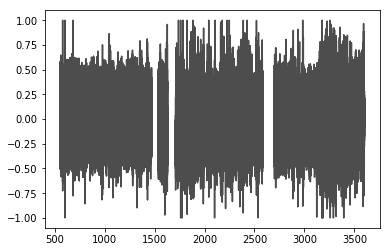

<AnalogSignalArray at 0x7fdf1b729390: 1 signal (13 segments)> for a total of 46:24.593 minutes

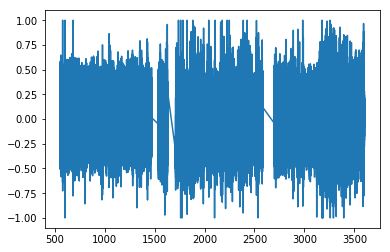

In [10]:
my_time_series = AnalogSignalArray([eeg],tdata=eegTimeStamps,)
npl.plot(my_time_series)
plt.show()
plt.plot(eegTimeStamps, eeg)
my_time_series

In [11]:
my_time_series.support.durations

array([ 105.69602911,  402.65272911,  402.65282911,    5.28442911,
         92.35812911,   14.09242911,  402.65282911,  402.65282911,
         54.86102911,   44.54312911,  402.90442911,  402.65272911,
         51.58952911])

In [12]:
my_time_series.support.merge(gap=0.1)

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:65: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:816: UserWarning: meta data is not available


<EpochArray at 0x7fdeebbc3b38: 4 epochs> of duration 46:24.597 minutes

In [13]:
my_time_series._support = my_time_series.support.merge(gap=0.1)
my_time_series.support.durations

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:65: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:816: UserWarning: meta data is not available


array([ 916.28722911,   92.35812911,  874.26022911,  901.69102911])

In [14]:
my_time_series

<AnalogSignalArray at 0x7fdf1b729390: 1 signal (4 segments)> for a total of 46:24.597 minutes

<EpochArray at 0x7fdeebcb3e10: 4 epochs> of duration 1:54 minutes


/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1461: UserWarning: ignoring signal outside of support


<AnalogSignalArray at 0x7fdeebba2a58: 2 signals (4 segments)> for a total of 1:54 minutes

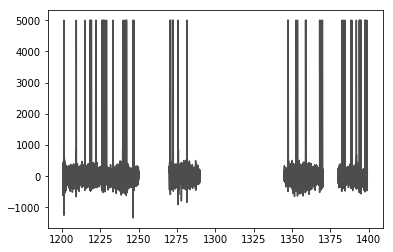

In [15]:
partialSupport = EpochArray([[1200,1250], [1270,1290], [1345,1370],[1380,1399]],fs=1)
my_lfp = AnalogSignalArray([lfp,onlineRippleDetect],tdata=timeStamps,support=partialSupport,fs=30000,step=10)
npl.plot(my_lfp)
print(my_lfp.support)
my_lfp

In [16]:
my_lfp[45345340]

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1449: UserWarning: Support specified is empty


<empty AnalogSignal>

[array([-0.21025995,  0.12837231]), array([ 0.16328703,  0.09999833]), array([ 0.06707391,  0.1199984 ]), array([ 0.1435688 ,  0.22806617])]
<EpochArray at 0x7fdeebcb3e10: 4 epochs> of duration 1:54 minutes
<AnalogSignalArray at 0x7fdeebac38d0: 2 signals (4 segments)> for a total of 1:54 minutes


/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1461: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1461: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1461: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1461: UserWarning: ignoring signal outside of support


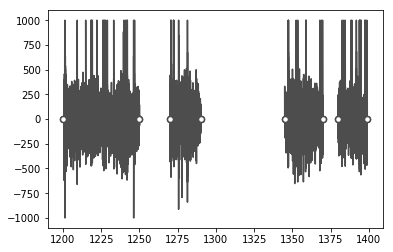

In [17]:
clipped_lfp = my_lfp.clip(-1000,1000)
npl.plot(clipped_lfp)
means = [snippet.mean() for snippet in clipped_lfp]
print(means)
print(clipped_lfp.support)
print(clipped_lfp)
npl.plot(clipped_lfp.support, means)

In [18]:
asa = nel.SpikeTrainArray([])
asa

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1904: UserWarning: no data; returning empty SpikeTrainArray


AttributeError: 'SpikeTrainArray' object has no attribute '_time'

In [ ]:
partialSupportForEtienne = EpochArray([[1200,1200.5], [1201.2,1201.3], [1201.5,1201.8],
                                       [1202,1202.2], [1202.5,1203]],fs=1)
mySuperRestrictedLFP = clipped_lfp[partialSupportForEtienne]
npl.plot(mySuperRestrictedLFP)

In [ ]:
mynewlfp = clipped_lfp[2]
npl.plot(mynewlfp)

# Random

In [ ]:
cow = np.array([[1,3,3],[3,1,3],[3,1,3],[3,1,2]])
cow.shape

In [ ]:
cow[:,[0,1]]

In [ ]:
cmoo = "%s cows %s moos" %(4,56)
print(cmoo)

In [ ]:
moo = np.squeeze(cow)
moo.shape

In [ ]:
try:
    if(timeStamps.shape[1]==cow.shape[1]):
        print("moo")
except:
    print("heyy")

# Interpolation

In [ ]:
print(timeStamps[0])
print(timeStamps[1])

In [ ]:
cow1 = []
cow1.append("moo")

In [ ]:
interpObj = interpolate.interp1d(timeStampsSeconds, lfp)

In [ ]:
xnew = np.arange(timeStampsSeconds[5000],timeStampsSeconds[5010],1/30000)
ynew = interpObj(xnew)
plt.plot(timeStampsSeconds[5000:5010], lfp[5000:5010],'o',xnew,ynew,'-')
plt.show()

In [ ]:
print(my_lfp.ydata[5000],lfp[5000])

In [ ]:
my_lfp = AnalogSignalArray([lfp],tdata=timeStampsSeconds,)
my_lfp

In [ ]:
print(np.min(xnew),np.max(xnew))

In [ ]:
print(timeStampsSeconds[1993])
print(my_lfp.time[3000])
print(my_lfp.time[4000])

In [ ]:
print(my_lfp.tdata[0]/30000,timeStamps[0]/30000,timeStampsSeconds[0])

In [ ]:
ytestnew = my_lfp.interp(xnew)
print(xnew.shape)
print((ytestnew).shape)
plt.plot(my_lfp.time[5000:5010], my_lfp.ydata[5000:5010],'o',xnew,np.squeeze(ytestnew),'-')
plt.show()